In [86]:
import os
import glob
import csv

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')


In [87]:
data_2 = pd.read_csv('../output/csi_data.csv')
# checking our dataframe once again
data_2 = data_2.drop([data_2.columns[0]], axis='columns')
data_2.head()


,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9,sub10,...,sub22,sub23,sub24,sub25,sub26,sub27,sub28,sub29,sub30,label
0,21.095023,26.305893,29.068884,30.000000,31.827661,32.000000,33.301652,32.140317,33.015148,33.955854,...,33.241540,33.301652,33.060551,31.144823,30.066593,28.425341,26.476405,22.825424,19.104973,0
1,18.384776,23.769729,25.495098,27.073973,28.017851,28.861739,29.154759,29.410882,29.068884,29.410882,...,30.066593,30.479501,30.265492,28.017851,26.925824,26.000000,23.853721,21.023796,17.464249,0
2,20.615528,26.019224,28.017851,30.083218,31.304952,32.310989,33.105891,32.893768,34.885527,34.205263,...,33.105891,31.953091,31.780497,31.384710,28.792360,28.301943,27.294688,22.627417,20.248457,0
3,20.808652,27.073973,29.068884,30.413813,31.906112,32.984845,32.449961,33.734256,34.409301,34.234486,...,33.421550,33.136083,33.421550,31.256999,30.805844,29.120440,26.400758,23.706539,20.000000,0
4,21.095023,26.305893,29.000000,30.149627,31.622777,32.557641,33.837849,33.541020,33.600595,34.234486,...,33.015148,32.388269,33.015148,31.400637,29.681644,28.460499,26.570661,22.472205,19.723083,0


In [88]:
X_data = data_2.iloc[:, 1:]
target = data_2.iloc[:, -1]


In [89]:
x_train, x_test, y_train, y_test = train_test_split(
    X_data, target, test_size=0.20, random_state=120, shuffle=False)  # false for timeseries
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_test.shape)


X_train.shape:  (838860, 30)
X_test.shape:  (209715, 30)


In [90]:
# Scaling
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(X_data)
# data_scaled
# print(data_scaled)
standardizer = StandardScaler()
data_scaled = standardizer.fit_transform(X_data)
data_scaled
print(data_scaled)


[[-0.4377487  -0.22671384 -0.21263364 ... -0.23467084 -0.30106064
  -0.4431347 ]
 [-0.93691384 -0.97006184 -0.88188411 ... -0.77519258 -0.87058014
  -0.4431347 ]
 [-0.49417063 -0.44532869 -0.19359977 ... -0.29407672  0.09585938
  -0.4431347 ]
 ...
 [-0.49417063 -0.49004329 -0.52469401 ...  0.96762047  1.05850306
  -0.4431347 ]
 [-0.53594503 -0.64165559 -0.59697916 ...  0.56628035  0.98275555
  -0.4431347 ]
 [-0.41535134 -0.40095457 -0.48884897 ...  0.70043239  0.70384589
  -0.4431347 ]]


In [91]:
x_test_scaled = standardizer.transform(x_test)
x_test_scaled


array([[-0.48283662, -0.59574676, -0.70283868, ..., -0.89768049,
        -0.87058014, -0.4431347 ],
       [ 0.10606021,  0.09053491,  0.10408166, ..., -0.10446815,
         0.36499109, -0.4431347 ],
       [ 0.29260093,  0.01530456,  0.08949137, ..., -0.07871806,
        -0.01646622, -0.4431347 ],
       ...,
       [-0.49417063, -0.49004329, -0.52469401, ...,  0.96762047,
         1.05850306, -0.4431347 ],
       [-0.53594503, -0.64165559, -0.59697916, ...,  0.56628035,
         0.98275555, -0.4431347 ],
       [-0.41535134, -0.40095457, -0.48884897, ...,  0.70043239,
         0.70384589, -0.4431347 ]])

In [92]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', dtype='float64'),
    tf.keras.layers.Dense(256, activation='relu', dtype='float64'),
    tf.keras.layers.Dense(256, activation='relu', dtype='float64'),
    tf.keras.layers.Dense(1, activation='sigmoid', dtype='float64')
])


In [93]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)


In [94]:
history = model.fit(x_train, y_train, epochs=4, batch_size=10)


Epoch 1/4
83886/83886 [==============================] - 89s 1ms/step - loss: 0.0190 - accuracy: 0.9950 - precision: 0.9959 - recall: 0.9698
Epoch 2/4
83886/83886 [==============================] - 88s 1ms/step - loss: 0.0056 - accuracy: 0.9997 - precision: 0.9997 - recall: 0.9982
Epoch 3/4
83886/83886 [==============================] - 86s 1ms/step - loss: 0.0031 - accuracy: 0.9992 - precision: 0.9997 - recall: 0.9950
Epoch 4/4
83886/83886 [==============================] - 86s 1ms/step - loss: 0.0023 - accuracy: 0.9998 - precision: 0.9998 - recall: 0.9987


In [95]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall'])

In [96]:
def vis(history, name):
    plt.title(f"{name.upper()}", fontsize=13)
    plt.xlabel('epochs', fontsize=20)
    plt.ylabel(f"{name.lower()}", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}", None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None:
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.05, 1.2), fontsize=16, ncol=1)


def plot_history(history):
    key_value = list(set([i.split("val_")[-1]
                     for i in list(history.history.keys())]))
    plt.figure(figsize=(20, 8))
    for idx, key in enumerate(key_value):
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

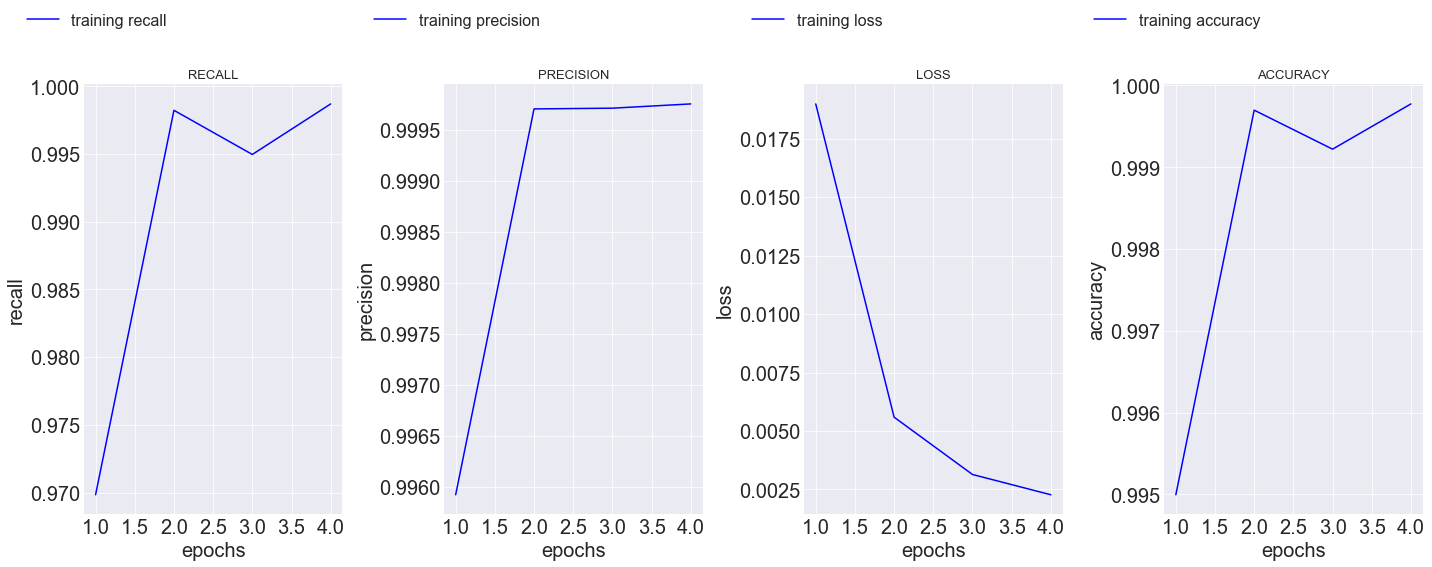

In [97]:
plot_history(history)

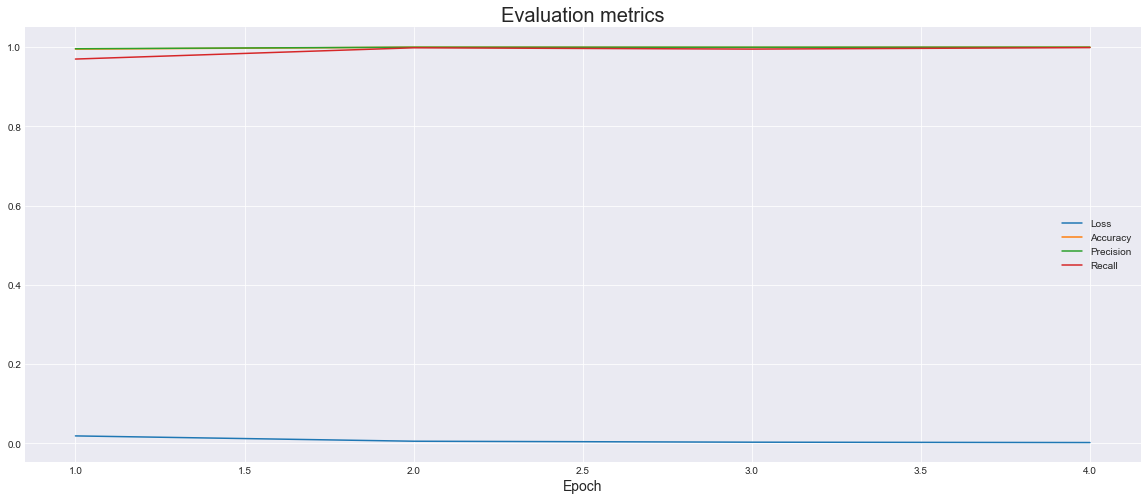

In [98]:
plt.plot(
    np.arange(1, 5),
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 5),
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 5),
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 5),
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()


In [99]:
predictions = model.predict(x_test_scaled)


In [100]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]


In [101]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))


[[93434 67131]
 [    0 49150]]


In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')


Accuracy: 0.68
Precision: 0.42
Recall: 1.00


In [103]:
x_train = x_train.values.reshape(838860, 30, 1)
x_test = x_test.values.reshape(209715, 30, 1)


In [104]:
# Set up parameters
n_steps = 30
n_features = 1
epochs = 3

# Create a traditional RNN network
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64, input_shape=(
    n_steps, n_features),  return_sequences=True,))
model.add(tf.keras.layers.Dense(32, activation='relu', dtype='float64'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', dtype='float64'))
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 64)            16896     
_________________________________________________________________
dense_28 (Dense)             (None, 30, 32)            2080      
_________________________________________________________________
dense_29 (Dense)             (None, 30, 1)             33        
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy', metrics=['accuracy'
])


In [108]:
model_RNN = model.fit(x_train, y_train, epochs=epochs, batch_size=10)


Epoch 1/3
83886/83886 [==============================] - 389s 5ms/step - loss: 0.3760 - accuracy: 0.8628
Epoch 2/3
83886/83886 [==============================] - 380s 5ms/step - loss: 0.3582 - accuracy: 0.8669
Epoch 3/3
83886/83886 [==============================] - 378s 5ms/step - loss: 0.3497 - accuracy: 0.8689


In [109]:
model_RNN.history.keys()

dict_keys(['loss', 'accuracy'])

In [110]:
from keras import backend as K


def recall(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    recall = true_positives / (all_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1_score(y_true, y_pred):
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


Using TensorFlow backend.


In [112]:
(loss, accuracy) = model.evaluate(x_test, y_test, verbose=1)

6554/6554 [==============================] - 19s 3ms/step - loss: 0.6547 - accuracy: 0.6641


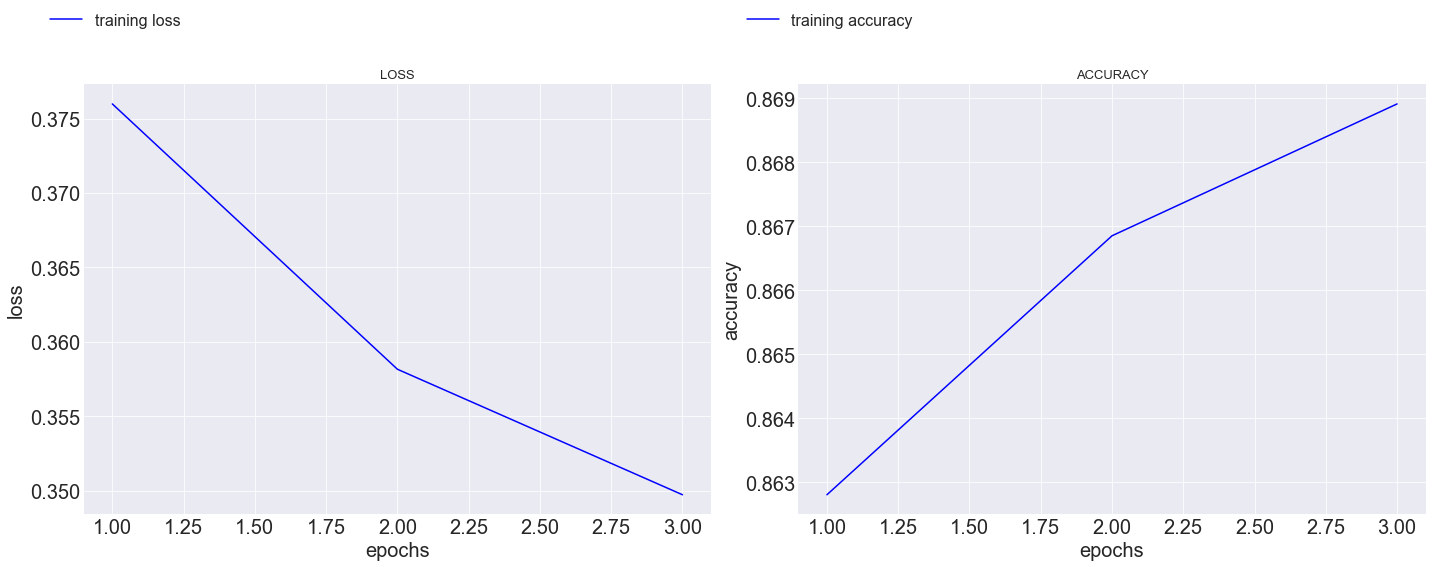

In [113]:
plot_history(model_RNN)
